<a href="https://colab.research.google.com/github/Ishaann1202/LibraryManagementSystemOriginal.java/blob/master/Handwritten_Digits_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from torchvision import datasets
from torchvision.transforms import ToTensor

In [3]:
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True,
)

test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor(),
    download = True,
)

100%|██████████| 9.91M/9.91M [00:00<00:00, 11.4MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 343kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.19MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.14MB/s]


In [4]:
train_data


Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [5]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [6]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [7]:
test_data.data.shape

torch.Size([10000, 28, 28])

In [8]:
train_data.targets.size()

torch.Size([60000])

In [9]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [10]:
from torch.utils.data import DataLoader

In [11]:

loaders = {
    'train': DataLoader(train_data,
                        batch_size=100,
                        shuffle=True,
                        num_workers=1),

    'test': DataLoader(test_data,
                       batch_size=100,
                       shuffle=True,
                       num_workers=1),

}


In [12]:
loaders


{'train': <torch.utils.data.dataloader.DataLoader at 0x7bfbc5f2aa90>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7bfbc5ef9410>}

In [13]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv1=nn.Conv2d(1,10,kernel_size=5)
        self.conv2=nn.Conv2d(10,20,kernel_size=5)
        self.conv2_drop=nn.Dropout2d()
        self.fc1=nn.Linear(320,50)
        self.fc2=nn.Linear(50,10)

    def forward(self,x):
        x=F.relu(F.max_pool2d(self.conv1(x),2))
        x=F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)),2))
        x=x.view(-1,320)
        x=F.relu(self.fc1(x))
        x=F.dropout(x,training=self.training)
        x=self.fc2(x)
        return F.softmax(x)


In [14]:
import torch
import torch.optim as optim
import torch.nn as nn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(loaders['train']):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()

        if batch_idx % 20 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(loaders["train"].dataset)} '
                  f'({100. * batch_idx / len(loaders["train"]):.0f}%)]\tLoss: {loss.item():.6f}')

def test():
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for data, target in loaders['test']:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_fn(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(loaders['test'])
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(loaders["test"].dataset)} '
          f'({100. * correct / len(loaders["test"].dataset):.0f}%)\n')

# Run training and testing loop
for epoch in range(1, 11):
    train(epoch)
    test()


<ipython-input-13-9930ebfac668>:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.302597
Train Epoch: 1 [2000/60000 (3%)]	Loss: 2.301283
Train Epoch: 1 [4000/60000 (7%)]	Loss: 2.234672
Train Epoch: 1 [6000/60000 (10%)]	Loss: 1.971412
Train Epoch: 1 [8000/60000 (13%)]	Loss: 1.879589
Train Epoch: 1 [10000/60000 (17%)]	Loss: 1.844073
Train Epoch: 1 [12000/60000 (20%)]	Loss: 1.822018
Train Epoch: 1 [14000/60000 (23%)]	Loss: 1.796270
Train Epoch: 1 [16000/60000 (27%)]	Loss: 1.820281
Train Epoch: 1 [18000/60000 (30%)]	Loss: 1.689098
Train Epoch: 1 [20000/60000 (33%)]	Loss: 1.784233
Train Epoch: 1 [22000/60000 (37%)]	Loss: 1.715759
Train Epoch: 1 [24000/60000 (40%)]	Loss: 1.733704
Train Epoch: 1 [26000/60000 (43%)]	Loss: 1.699518
Train Epoch: 1 [28000/60000 (47%)]	Loss: 1.691168
Train Epoch: 1 [30000/60000 (50%)]	Loss: 1.732498
Train Epoch: 1 [32000/60000 (53%)]	Loss: 1.686617
Train Epoch: 1 [34000/60000 (57%)]	Loss: 1.687722
Train Epoch: 1 [36000/60000 (60%)]	Loss: 1.675147
Train Epoch: 1 [38000/60000 (63%)]	Loss: 1.686683
Train Epoch

Prediction: tensor([[2]])


<ipython-input-13-9930ebfac668>:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


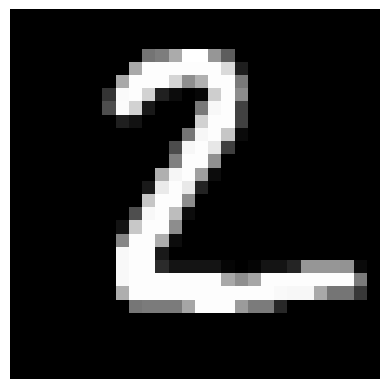

In [22]:
import torch
import matplotlib.pyplot as plt

model.eval()
data, target = test_data[1]  # Get one test sample
data = data.unsqueeze(0).to(device)  # Add batch dimension

output = model(data)
prediction = output.argmax(dim=1, keepdim=True)
print(f'Prediction: {prediction}')

# Fix squeeze issue
image = data.squeeze().cpu().numpy()  # Ensure correct shape (28,28)

# Display the image
plt.imshow(image, cmap='gray')
plt.axis('off')  # Optional: Hide axes for clarity
plt.show()
